In [46]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import re #to handle regular expression when replacing
#let's import a library do deal with stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#needed for ex3 e)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


#ex1
df = pd.read_csv('sms_spam.csv')
print(df)

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#ex2
#Explore dataset
#a) View some ham/sam messages
print('Ham Messages:')
print(df[df['type'] == 'ham'].head(3))

print()

print('Spam Messages:')
print(df[df['type'] == 'spam'].head(3))


Ham Messages:
  type                                               text
0  ham  Go until jurong point, crazy.. Available only ...
1  ham                      Ok lar... Joking wif u oni...
3  ham  U dun say so early hor... U c already then say...

Spam Messages:
   type                                               text
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
8  spam  WINNER!! As a valued network customer you have...


In [48]:
#ex2
#b)
#View the sms with highest number of words
#AKA
#view the sms with the highest length after a split (" ")

highest_sms_df = df
highest_sms_df['text_len'] = highest_sms_df['text'].apply(len)
highest_sms_df['word_count'] = highest_sms_df['text'].str.split().apply(len)
highest_sms_df = highest_sms_df.sort_values(by=['word_count', 'text_len'], ascending=[False, False])
highest_sms_df.drop(columns=['text_len', 'word_count'], inplace=True)
print(highest_sms_df.iloc[0]['text'])



For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [49]:
#ex2
#c)
#Check the distribution of the target attribute
#Let's check how many "ham" or "spam" messags we have

print(df['type'].value_counts())

ham     4827
spam     747
Name: type, dtype: int64


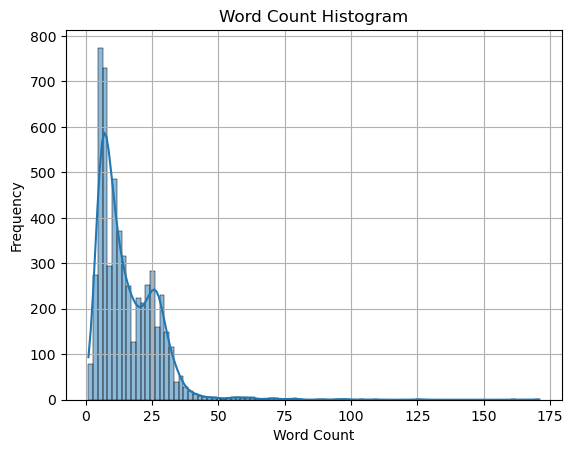

In [50]:
#ex2
#d)
#make an histogram with the distribution of the number of words in the texts


word_count = df['word_count']
# print(word_count)

sns.histplot(word_count, kde=True)
plt.title("Word Count Histogram")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [51]:
#ex3
#Text PreProcessing

In [52]:
#a function that does all the preprocessing a)-e)
#the order is important, so
# convert everything to lower case
# remove number
# remove special characters
# remove stop words
# reduce words to radical using Porter stemmer

#function to remove stop words from a text
def remove_stopWords(sentence):
    stop_words = set(stopwords.words('english'))
    words = sentence.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words).strip()

#function to use the stemmer
def use_stemmer(sentence):
    #Initialize the stemmer
    stemmer = PorterStemmer()
    words = sentence.split()
    filtered = [stemmer.stem(word) for word in words]
    return ' '.join(filtered).strip()
df['text'] = df['text'].apply(use_stemmer)

def text_preprocessing(sentence: str):

    special_characters = r'[!@#$%^&*()_+{}\[\]:;"\'<>,.?/\\|`\-=~]'

    sentence = sentence.lower()
    sentence = re.sub(r'\d', '', sentence)
    sentence = re.sub(special_characters, '', sentence)
    sentence = remove_stopWords(sentence)
    sentence = use_stemmer(sentence)

    return sentence

    

In [53]:
#ex4
#let's apply the previous function to the text column in the dataframe:

df['text'] = df['text'].apply(text_preprocessing)

print(df['text'].loc[21])

i‘m go tri month ha ha onli joke


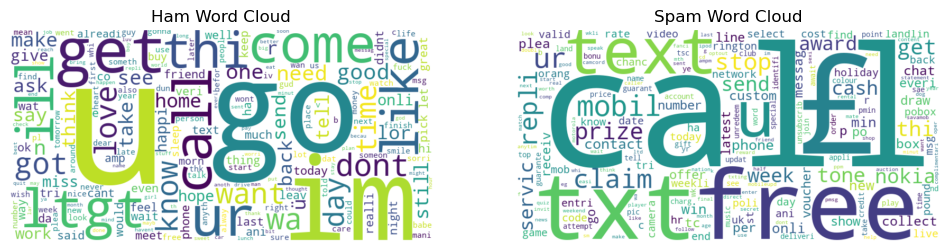

In [54]:
#ex5
#let's check the most popular messages, using a word cloud


#let's create 2 dfs, one for each type of message
ham_df = df[df['type'] == 'ham']
spam_df = df[df['type'] == 'spam']

#let's count the frequency of the words
ham_word_counts = Counter(''.join(ham_df['text']).split())
spam_word_counts = Counter(''.join(spam_df['text']).split())

#let's generate the world cloud for each type
ham_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_counts)
spam_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_counts)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordCloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordCloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.show()

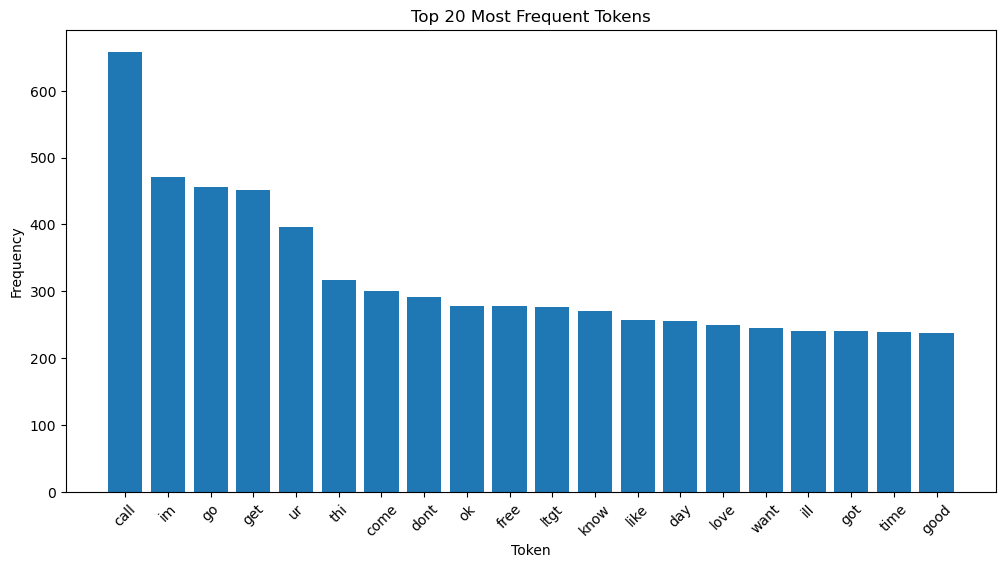

In [55]:
#ex6
#With the count vectorizer function (sklearn), convert the corpus into a token/occurrence matrix.

#first let's initialize the countVectorizer
count_vectorizer = CountVectorizer()

#fit and transform the preprocessed text
token_occurrence_matrix = count_vectorizer.fit_transform(df['text'])


#convert the matrix to an array
token_occurrence_matrix_dense = token_occurrence_matrix.toarray()

# You can also access the feature names (tokens/words) as follows:
feature_names = count_vectorizer.get_feature_names_out()


#let's do some visualization
token_frequencies = token_occurrence_matrix_dense.sum(axis=0)
df_token_frequencies = pd.DataFrame({'Token': feature_names, 'Frequency': token_frequencies})
df_token_frequencies = df_token_frequencies.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_token_frequencies['Token'][:20], df_token_frequencies['Frequency'][:20])
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Tokens')
plt.xticks(rotation=45)
plt.show()


In [56]:
#ex7
#Visualise quantitatively and graphically the occurrence of terms in all SMS and the number of terms in
#each SMS and define the terms and SMS to maintain.


Mean term occurrences: 6.806032677000419
Median term occurrences: 1.0
Standard deviation of term occurrences: 23.8671074601708


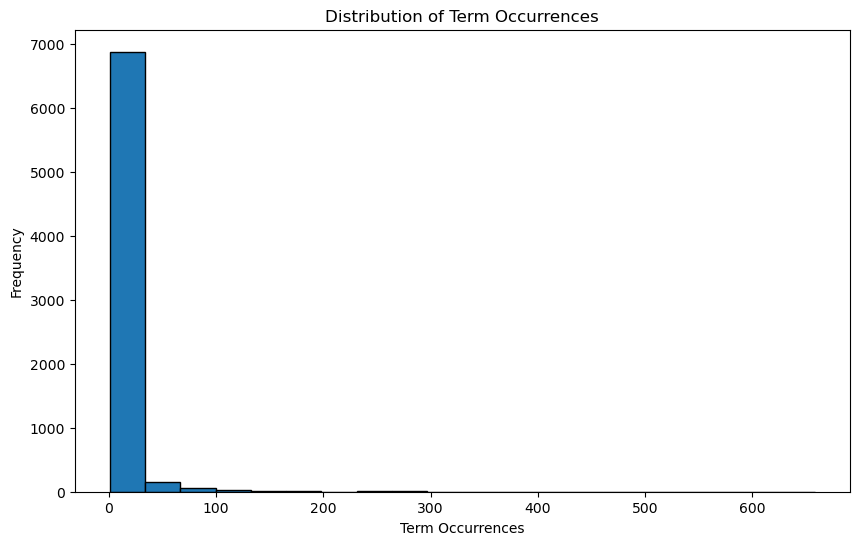

In [57]:
#first, let's visualize all term occurrences in all SMS

# Calculate the total occurrences of each term across all SMS messages
term_occurrences = np.sum(token_occurrence_matrix_dense, axis=0)

# Visualize the term occurrences quantitatively
print(f"Mean term occurrences: {np.mean(term_occurrences)}")
print(f"Median term occurrences: {np.median(term_occurrences)}")
print(f"Standard deviation of term occurrences: {np.std(term_occurrences)}")

# Create a histogram to visualize the distribution of term occurrences
plt.figure(figsize=(10, 6))
plt.hist(term_occurrences, bins=20, edgecolor='k')
plt.xlabel('Term Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Term Occurrences')
plt.show()

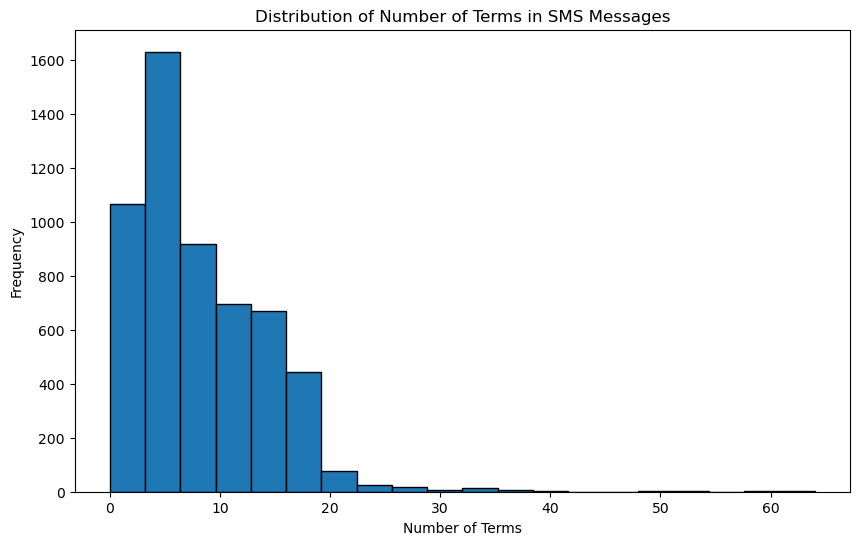

In [58]:
# Calculate the number of terms in each SMS message
num_terms_per_sms = np.sum(token_occurrence_matrix_dense > 0, axis=1)

# Create a histogram to visualize the distribution of the number of terms in SMS messages
plt.figure(figsize=(10, 6))
plt.hist(num_terms_per_sms, bins=20, edgecolor='k')
plt.xlabel('Number of Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Terms in SMS Messages')
plt.show()